In [1]:
## DATA VISUALIZATIONS

In [2]:
# IMPORTS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import plotly.plotly as py
import plotly.figure_factory as ff
import geopandas


In [4]:
## DATA Graphs - Wage Disparity -  Bubble Chart of WA State Occupations 

In [5]:
merge_categories = pd.read_csv('merge_categories2016.csv')

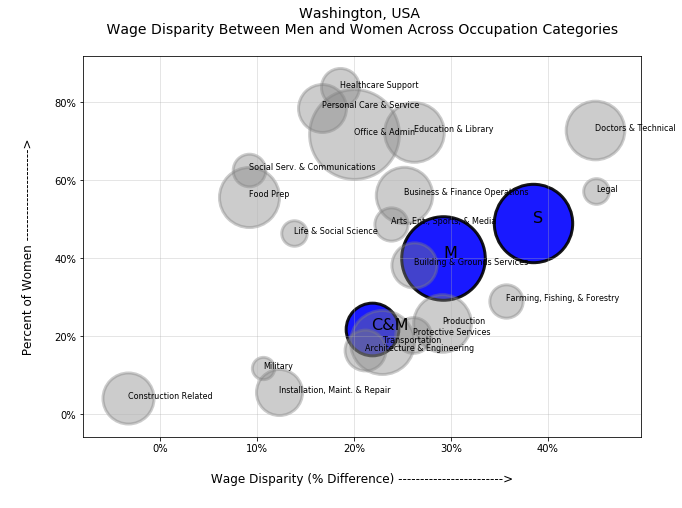

In [10]:
textstr = "NOTE: Size of Bubble is the Total Number of People Employed in Job Category"

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title('Washington, USA \n Wage Disparity Between Men and Women Across Occupation Categories \n', fontsize=14,)
ax.set_xlabel ('\n Wage Disparity (% Difference) ------------------------> \n', fontsize =12, )  
ax.set_ylabel ('\n Percent of Women ---------------------> \n', fontsize=12, )


labels = [0.0, 0.1, 0.2, 0.3, 0.4]

# You can specify a rotation for the tick labels in degrees or with keywords.
#ax.set_xticks(x, labels)
#vals = ax.get_xticks()
#ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

ax.grid(alpha=.4)
for num in range(23):
    
    if merge_categories.category_name[num] in ('Sales', 'Computer & Math', 'Management'):
        ax.scatter( merge_categories.pct_wage_diff[num],merge_categories.pct_female[num], s=merge_categories.tot_cat_ppl[num]/50, alpha=0.90,
                c='blue',edgecolor='black',linewidths=3) #label=merge_categories.category_name[num], 
   
        plt.text(merge_categories.pct_wage_diff[num],merge_categories.pct_female[num] ,merge_categories.short_cat[num],fontsize=16)
  
    else:
        ax.scatter( merge_categories.pct_wage_diff[num],merge_categories.pct_female[num] ,  s=merge_categories.tot_cat_ppl[num]/50, alpha=0.40,
                c='gray',edgecolor='gray',linewidths=3) #label=merge_categories.category_name[num], 
   
        plt.text(merge_categories.pct_wage_diff[num],merge_categories.pct_female[num] ,merge_categories.category_name[num],fontsize=8)
   
        

#plt.text(50, 20, textstr, fontsize=12)
plt.savefig('WA_Wage_Disparity_Across_Occupations.png',dpi=200)
plt.show()



In [7]:
# Bar Chart of 3-YR WAGE DISPARITY BY TECH RELATED OCCUPATION CATEGORIES

In [8]:
# State Chart for Occ code 11 (Management)

In [36]:
df_file = pd.read_csv('state_tech_occ11.csv', dtype={'f1': np.str})

df_file.head()

df_file.reset_index(inplace=True)
df1 = df_file[df_file['soc_cat'] == 11]

df1.head()
# df1.info()

,index,Unnamed: 0,state_cd,f1,soc_cat,f_num_ppl,f_total_wages,m_num_ppl,m_total_wages,f_avg_wage,m_avg_wage,wage_diff,pct_wage_diff,perc_women
0,0,3,AL,01,11,67586,3.970325e+09,100194,9.678064e+09,58744.780873,96593.251557,37848.470684,0.391833,0.402825
1,1,75,MS,28,11,36115,1.876023e+09,51032,4.329961e+09,51945.811222,84847.963978,32902.152755,0.387778,0.414415
2,2,54,LA,22,11,68730,3.940269e+09,94287,8.722812e+09,57329.678685,92513.411969,35183.733284,0.380310,0.421612
3,3,108,OK,40,11,57921,3.391323e+09,90351,8.349011e+09,58550.830763,92406.402620,33855.571857,0.366377,0.390640
4,4,6,AR,05,11,40406,2.273172e+09,59418,5.206217e+09,56258.277397,87620.196902,31361.919505,0.357930,0.404772


In [37]:

# for col in df.columns:
#     df[col] = df[col].astype(str)

data = [ dict(
        type='choropleth',
        colorscale = 'YlOrRd',
        #autocolorscale = False,
        locations = df1['state_cd'],
        z = df['pct_wage_diff'].astype(float),
        locationmode = 'USA-states',
       # text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% Wage <br> Disparity")
        ) ]

layout = dict(
        title = '2016 Management Occupation Category <br> Wage Disparity by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='2016_Management_Occupations_by_State.png' )



In [ ]:
### State Chart for Computer and Math Occupations

In [38]:
df_file = pd.read_csv('state_tech_occ15.csv', dtype={'f1': np.str})

df_file.head()

df_file.reset_index(inplace=True)
df1 = df_file[df_file['soc_cat'] == 15]

df1.head()
# df1.info()

,index,Unnamed: 0,state_cd,f1,soc_cat,f_num_ppl,f_total_wages,m_num_ppl,m_total_wages,f_avg_wage,m_avg_wage,wage_diff,pct_wage_diff,perc_women
0,0,79,MT,30,15,2350,1.092482e+08,5152,3.387670e+08,46488.591872,65754.473195,19265.881323,0.292997,0.313250
1,1,91,NH,33,15,5593,4.053983e+08,18334,1.774966e+09,72483.150814,96812.819292,24329.668479,0.251306,0.233753
2,2,142,WA,53,15,30216,2.541499e+09,108501,1.167119e+10,84111.019020,107567.604479,23456.585459,0.218064,0.217825
3,3,49,KS,20,15,9087,5.258217e+08,26718,1.974100e+09,57865.264433,73886.535826,16021.271393,0.216836,0.253791
4,4,40,ID,16,15,3185,1.773135e+08,11775,8.352092e+08,55671.419278,70930.721299,15259.302021,0.215130,0.212901


In [39]:

# for col in df.columns:
#     df[col] = df[col].astype(str)

data = [ dict(
        type='choropleth',
        colorscale = 'YlOrRd',
        #autocolorscale = False,
        locations = df1['state_cd'],
        z = df1['pct_wage_diff'].astype(float),
        locationmode = 'USA-states',
       # text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% Wage <br> Disparity")
        ) ]

layout = dict(
        title = '2016 Computer & Math Occupation Category <br> Wage Disparity by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='2016_Computer_Math_Occupations_by_State.png' )



In [ ]:
## SALES OCCUPATION CATEGORIES BY  STATE

In [41]:
df_file = pd.read_csv('state_tech_occ4.csv', dtype={'f1': np.str})

df_file.head()

df_file.reset_index(inplace=True)
df1 = df_file[df_file['soc_cat'] == 41]

df1.head()
# df1.info()

,index,Unnamed: 0,state_cd,f1,soc_cat,f_num_ppl,f_total_wages,m_num_ppl,m_total_wages,f_avg_wage,m_avg_wage,wage_diff,pct_wage_diff,perc_women
0,0,56,LA,22,41,116490,3.333562e+09,88267,5.489164e+09,28616.725036,62188.178684,33571.453648,0.539837,0.568918
1,1,20,CT,09,41,85686,4.043714e+09,92937,8.774727e+09,47192.232225,94415.865718,47223.633493,0.500166,0.479703
2,2,149,WV,54,41,38346,9.770647e+08,33934,1.726004e+09,25480.224391,50863.552478,25383.328087,0.499047,0.530520
3,3,152,WY,56,41,12959,3.648479e+08,11550,6.482187e+08,28154.019855,56122.832476,27968.812621,0.498350,0.528745
4,4,5,AL,01,41,115107,3.448079e+09,90565,5.243885e+09,29955.425782,57901.899078,27946.473296,0.482652,0.559663


In [43]:

# for col in df.columns:
#     df[col] = df[col].astype(str)

data = [ dict(
        type='choropleth',
        colorscale = 'YlOrRd',
        #autocolorscale = False,
        locations = df1['state_cd'],
        z = df1['pct_wage_diff'].astype(float),
        locationmode = 'USA-states',
       # text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% Wage <br> Disparity")
        ) ]

layout = dict(
        title = '2016 Sales Occupation Category <br> Wage Disparity by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='2016_Sales_Occupations_by_State.png' )
